In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
data = []
labels = []
for i in range(1, 6):
    batch_name = f'data_batch_{i}'
    batch = unpickle(batch_name)
    data.append(batch[b'data'])
    labels.extend(batch[b'labels'])

# Convert list to numpy arrays
data = np.vstack(data)
labels = np.array(labels)
np.save('data.npy', data)
np.save('labels.npy', labels)
# Reshape data to the format (number of samples, height, width, channels)
data = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print("Training Data shape:", data.shape)
print("Training Labels shape:", labels.shape)
test_batch = unpickle('test_batch')
test_data = test_batch[b'data']
test_labels = test_batch[b'labels']

# Convert to numpy arrays
test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Save test data
np.save('test_data.npy', test_data)
np.save('test_labels.npy', test_labels)

# Reshape test data
test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
print("Testing Data shape:", test_data.shape)
print("Testing Labels shape:", test_labels.shape)

Training Data shape: (50000, 32, 32, 3)
Training Labels shape: (50000,)
Testing Data shape: (10000, 32, 32, 3)
Testing Labels shape: (10000,)


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

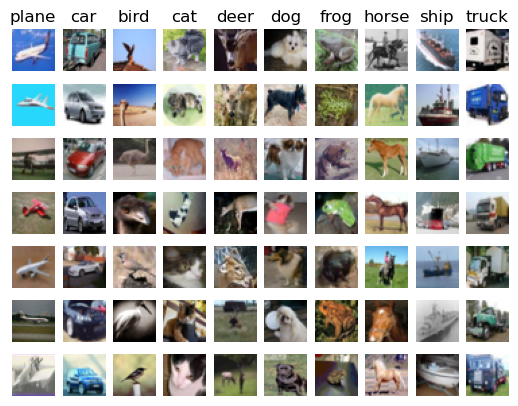

In [5]:
#data samples
import matplotlib.pyplot as plt

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [13]:
data_flat = data.reshape(data.shape[0], -1)
test_data_flat = test_data.reshape(test_data.shape[0], -1)

x_train, x_val, y_train, y_val = train_test_split(data_flat, labels, test_size=0.1, random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

train_accuracies = []
val_accuracies = []
test_accuracies = []
test_predictions = []

best_accuracy = 0
best_k = 1
k_values = [1, 2, 3, 5, 8, 10, 12, 15, 20, 50, 75, 100, 150, 200, 500, 1000]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)

    y_train_pred = knn.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Predict on the validation set
    y_val_pred = knn.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)
    
    # Predict on the test set
    y_test_pred = knn.predict(test_data_flat)
    test_accuracy = accuracy_score(test_labels, y_test_pred)
    test_accuracies.append(test_accuracy)
    
    print(f'k = {k}, Accuracy: {val_accuracy * 100:.2f}%')
    
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_k = k

print(f'Best k: {best_k}, Best Accuracy: {best_accuracy * 100:.2f}%')

k = 1, Accuracy: 33.66%
k = 2, Accuracy: 30.52%
k = 3, Accuracy: 32.16%
k = 5, Accuracy: 34.16%
k = 8, Accuracy: 33.32%
k = 10, Accuracy: 32.98%
k = 12, Accuracy: 32.52%
k = 15, Accuracy: 32.00%
k = 20, Accuracy: 31.66%
k = 50, Accuracy: 30.64%
k = 75, Accuracy: 30.42%
k = 100, Accuracy: 29.66%
k = 150, Accuracy: 29.42%
k = 200, Accuracy: 28.64%
k = 500, Accuracy: 26.44%
k = 1000, Accuracy: 24.74%
Best k: 5, Best Accuracy: 34.16%


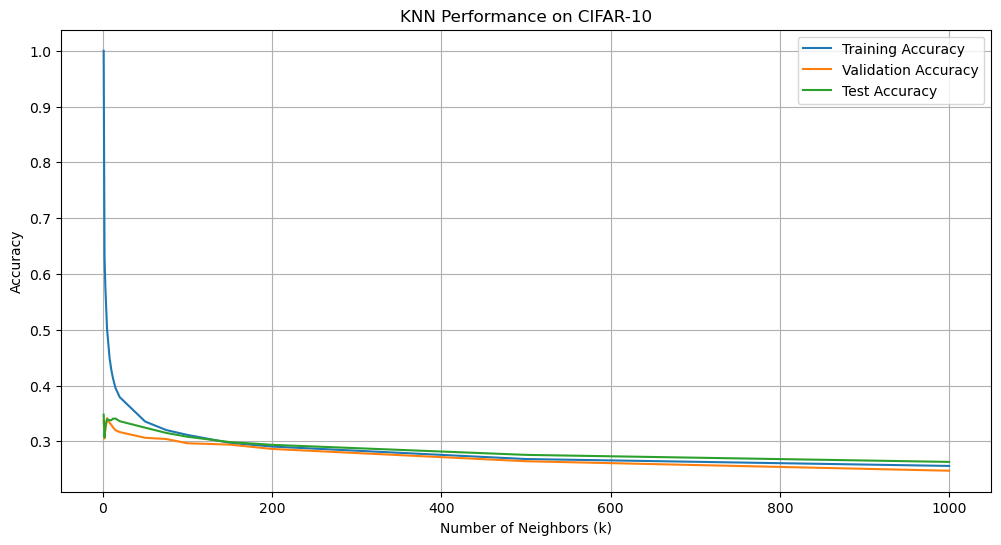

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, val_accuracies, label='Validation Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Performance on CIFAR-10')
plt.legend()
plt.grid(True)
plt.show()

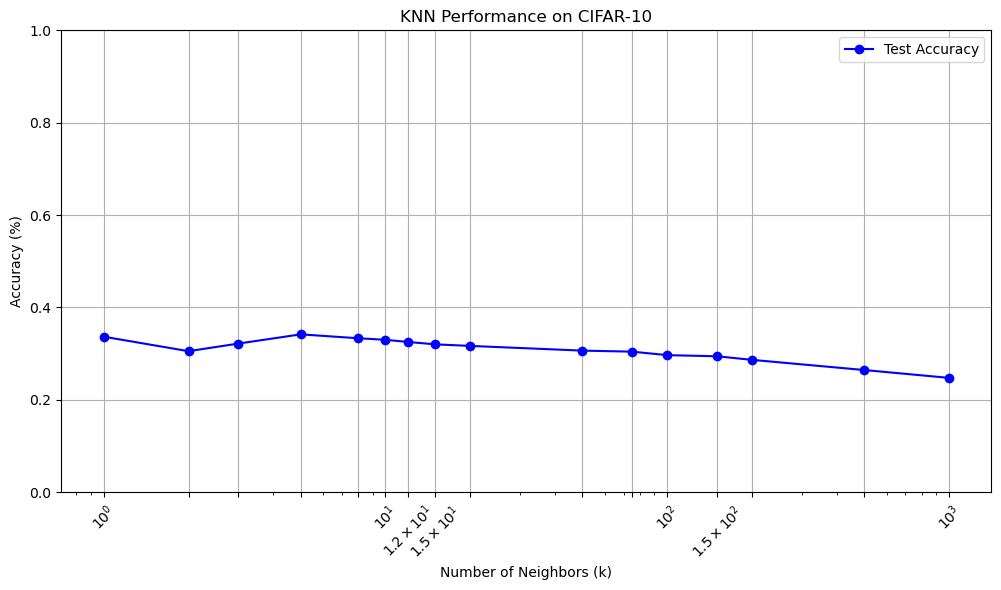

In [36]:
# Plot the accuracies
plt.figure(figsize=(12, 6))
plt.plot(k_values, val_accuracies, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.title('KNN Performance on CIFAR-10')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.xticks(k_values, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()